In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pickle 

In [2]:
path = 'noncoated/*/*.npz'

In [3]:
npz_files = glob(path) 

In [4]:
print(npz_files)
print(len(npz_files))

['noncoated\\20210407_LCLC_H838_nonc\\A1_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\A2_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\A3_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\A4_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\B1_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\B2_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\B3_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\B4_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\C1_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\C2_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\C3_seg.npz', 'noncoated\\20210407_LCLC_H838_nonc\\C4_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\A1_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\A2_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\A3_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\A4_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\B1_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\B2_seg.npz', 'noncoated\\20210408_MDAMB231_HepG2_nonc\\B3_seg.npz', 'noncoated\\20

In [5]:
biosensor = []
microscope = []
masks = []

In [6]:
for file in npz_files:
    with np.load(file) as data:
        biosensor.append(data['well'] )
        microscope.append(data['im_mic'])
        masks.append(data['im_markers'])

In [7]:
data_len = len(biosensor)
print(data_len)

73


In [8]:
# The biosensor length is not the same for all the files
avg_time = np.mean([bio.shape[0] for bio in biosensor])
std_time = np.std([bio.shape[0] for bio in biosensor])
min_time = np.min([bio.shape[0] for bio in biosensor])
max_time = np.max([bio.shape[0] for bio in biosensor])
print(avg_time, std_time, min_time, max_time)

966.2328767123288 253.74685479111272 581 1418


In [9]:
# The mask or the microscope image is not the same for all the files
avg_mask = np.mean([mask.shape[0] for mask in masks])
std_mask = np.std([mask.shape[0] for mask in masks])
min_mask = np.min([mask.shape[0] for mask in masks])
max_mask = np.max([mask.shape[0] for mask in masks])
print(avg_mask, std_mask, min_mask, max_mask)

4088.1369863013697 191.45544315637855 3319 4258


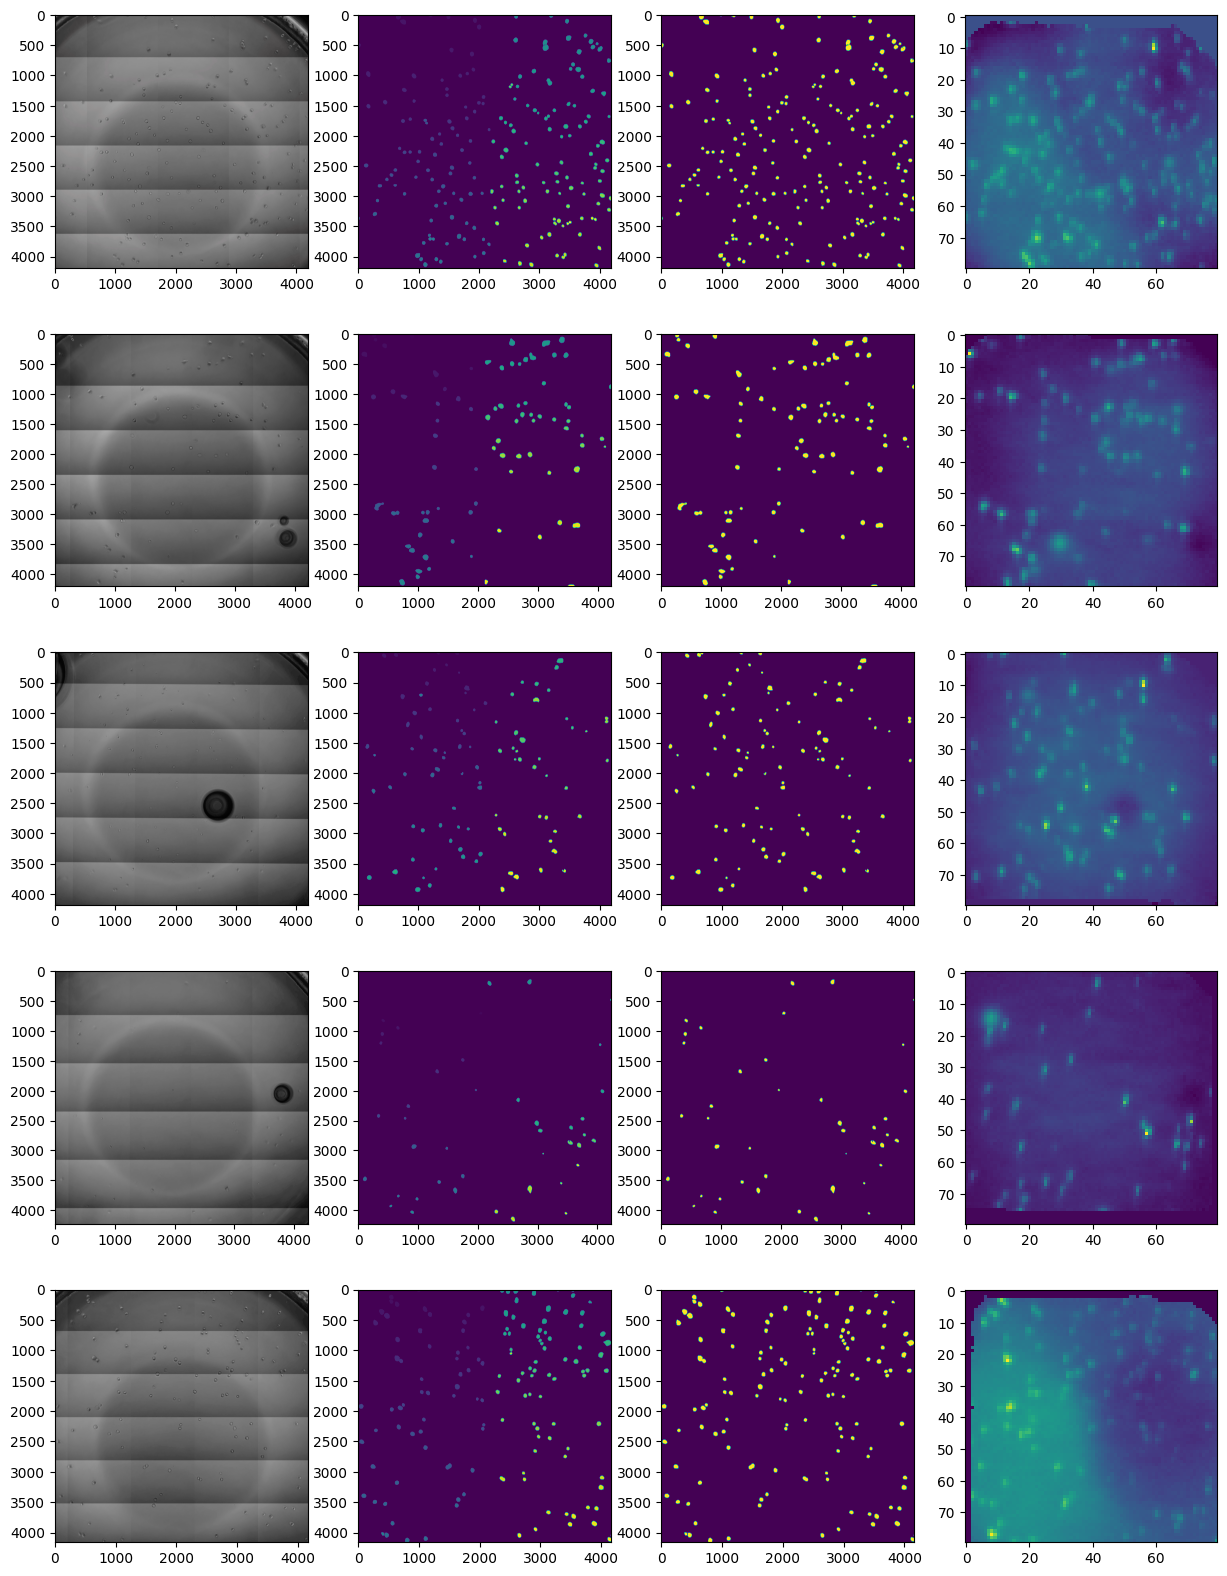

In [18]:
fig, axs = plt.subplots(5, 4, figsize=(15, 20))

for i in range(5):
    axs[i, 0].imshow(microscope[i])
    axs[i, 1].imshow(masks[i])
    axs[i, 2].imshow(boolean_masks[i])
    axs[i, 3].imshow(biosensor[i][-100])

plt.show()

In [12]:
# To display all the elements of the matrix
np.set_printoptions(threshold=np.inf)

In [17]:
print(masks[0][500])

[ 17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17
  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17
  17  17  17  17  17  17  17  17  17  17   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [14]:
import copy
boolean_masks = copy.deepcopy(masks)

In [15]:
# creating boolean masks
for mask in boolean_masks:
    mask[mask > 0] = 1

In [16]:
print(boolean_masks[0][500])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [14]:
with open('pickles/biosensor.pkl', 'wb') as out_file:
    pickle.dump(biosensor, out_file)
    
with open('pickles/microscope.pkl', 'wb') as out_file:
    pickle.dump(microscope, out_file)
    
with open('pickles/masks.pkl', 'wb') as out_file:
    pickle.dump(masks, out_file)

In [28]:
with open('pickles/boolean_masks.pkl', 'wb') as out_file:
    pickle.dump(boolean_masks, out_file)

In [20]:
with open('pickles/biosensor.pkl', 'rb') as in_file:
    biosensor = pickle.load(in_file)

with open('pickles/microscope.pkl', 'rb') as in_file:
    microscope = pickle.load(in_file)
    
with open('pickles/masks.pkl', 'rb') as in_file:
    masks = pickle.load(in_file)

with open('pickles/boolean_masks.pkl', 'rb') as in_file:
    boolean_masks = pickle.load(in_file)